## Inflow Analysis  
### The Ljungan River: Holmsjön and Flasjön  

In this Notebook We analyze the inflow Data for the Flasjön and Holmsjön Reservoirs in the Ljungan River. The reservoirs are yearly regulating reservoirs in which nominations are made for discharge by the power producers.  

The goals of this file are to:  

-Get an Overview of the Reservoir Data and prepare it accordingly  
-Visualize Historic Data: Reservoir Levels over time, Inflow and inflow changes, Discharges  
-Fit Statistical Model to Reservoir Levels/Inflow 

In [16]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima

In [2]:
d = "C:\\Users\\Lenni\\Documents\\Master Thesis\\Code Master Thesis\\Code-Master-Thesis\\Data\\Inflow\\Data from Flasjoen and Holmsjoen.xlsx"

In [3]:
c_names = ["Date", "Flasjon Water Level", "Flasjon Volume", "Flasjon Inflow", "Flasjon discharge", "Holmsjon Water Level", "Holmsjon Volume", "Holmsjon Inflow", "Holmsjon Discharge"]
df = pd.read_excel(d, header=0, names=c_names, index_col=0)

df.head()

,Flasjon Water Level,Flasjon Volume,Flasjon Inflow,Flasjon discharge,Holmsjon Water Level,Holmsjon Volume,Holmsjon Inflow,Holmsjon Discharge
Date,,,,,,,,
2006-01-01,484.00,2087.0,12.8,49.0,244.39,1928,13.6,53.2
2006-01-02,483.83,2056.0,13.6,49.0,244.42,1947,22.7,89.1
2006-01-03,483.69,2031.0,10.2,49.0,244.41,1941,13.4,85.9
2006-01-04,483.52,2000.0,10.2,50.0,244.41,1941,23.0,88.1
2006-01-05,483.34,1968.0,8.2,52.0,244.41,1941,15.0,86.2


In [4]:
df.describe()

,Flasjon Water Level,Flasjon Volume,Flasjon Inflow,Flasjon discharge,Holmsjon Water Level,Holmsjon Volume,Holmsjon Inflow,Holmsjon Discharge
count,6397.000000,6397.000000,6396.000000,6396.000000,6397.000000,6397.000000,6397.000000,6396.000000
mean,485.376625,2562.251898,26.030604,25.827359,243.517652,1440.118180,42.788698,68.548669
std,7.664080,1300.114872,32.851041,21.299452,1.095048,596.894627,48.478196,33.327018
min,465.370000,15.200000,-2.640000,0.000000,240.460000,5.000000,-48.200000,9.300000
25%,480.190000,1445.000000,8.030000,0.170000,242.830000,1029.000000,14.000000,43.790000
50%,487.800000,2833.000000,14.240000,25.325000,243.970000,1675.000000,30.800000,66.000000
75%,491.490000,3654.000000,29.232500,47.102500,244.320000,1886.000000,57.500000,87.695000
max,495.200000,4602.000000,340.990000,74.000000,244.850000,2216.000000,423.600000,350.410000


array([<AxesSubplot:xlabel='Data', ylabel='Volume [Mm^3]'>,
       <AxesSubplot:xlabel='Data', ylabel='Volume [Mm^3]'>], dtype=object)

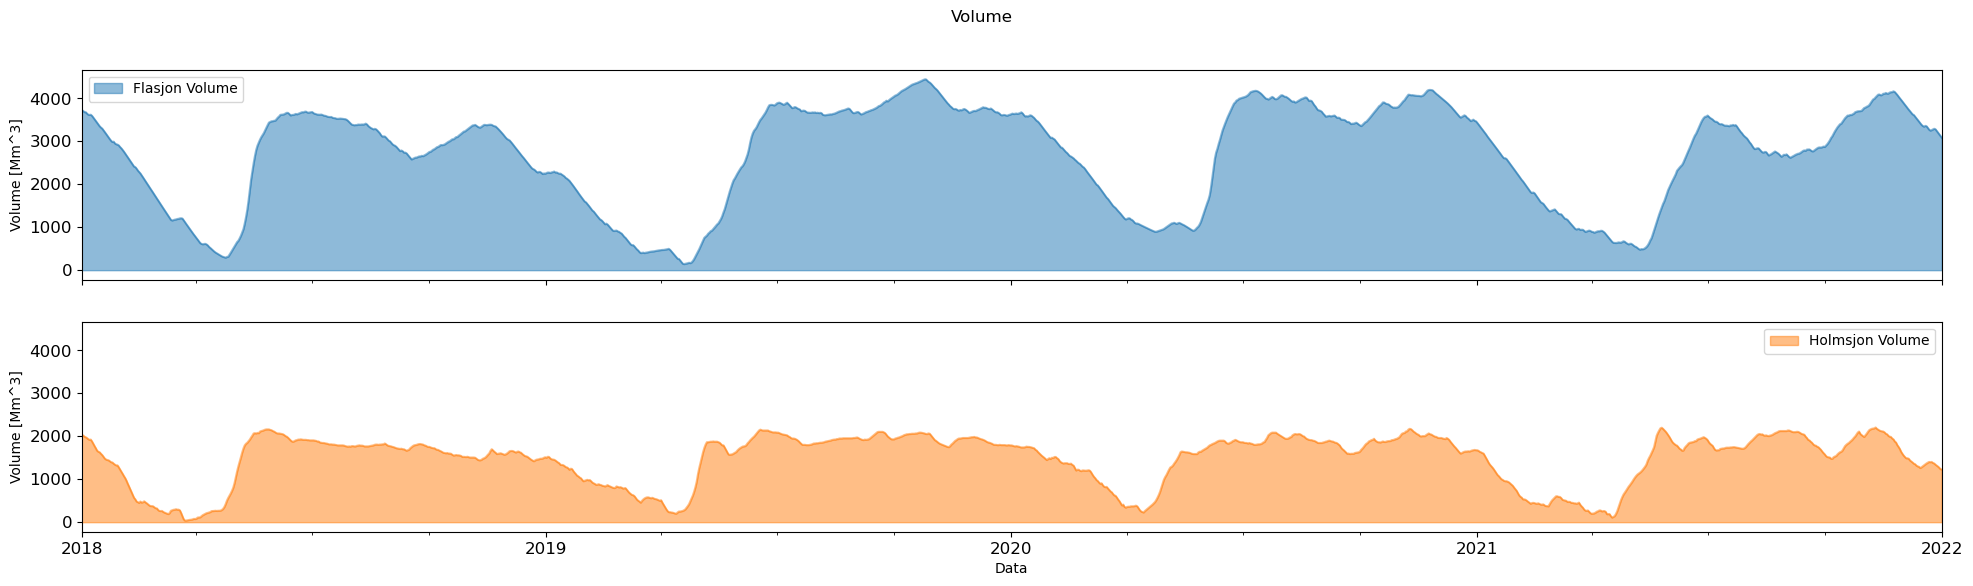

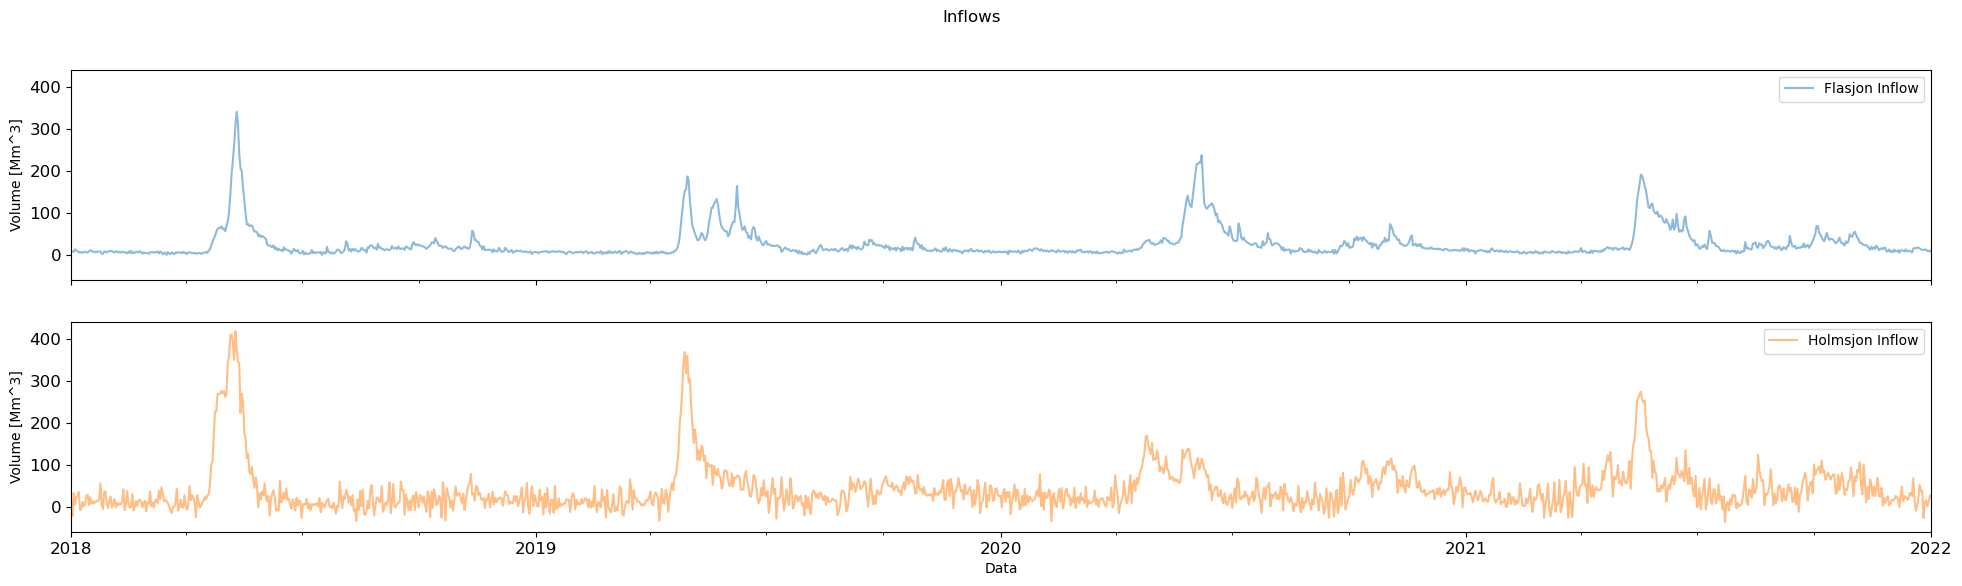

In [13]:
start_date, end_date = "2018-01-01", "2022-01-01"
volumes = df[["Flasjon Volume", "Holmsjon Volume"]]
inflows = df[["Flasjon Inflow", "Holmsjon Inflow"]]
volumes.loc[start_date : end_date].plot(kind="area", xlabel="Data", ylabel="Volume [Mm^3]", figsize=(24,6), subplots=True, sharey=True, title="Volume", fontsize=12, alpha=0.5 )
inflows.loc[start_date : end_date].plot(xlabel="Data", ylabel="Volume [Mm^3]", figsize=(24,6), subplots=True, sharey=True, title="Inflows", fontsize=12, alpha=0.5 )

In [12]:
volumes.loc["2015-01-01" : "2022-01-01"]

,Flasjon Volume,Holmsjon Volume
Date,,
2006-01-01,2087.0,1928
2006-01-02,2056.0,1947
2006-01-03,2031.0,1941
2006-01-04,2000.0,1941
2006-01-05,1968.0,1941
...,...,...
2006-12-28,3939.0,1972
2006-12-29,3901.0,1978
2006-12-30,3867.0,1978
